In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Data Loading

In [25]:
data = pd.read_csv("Titanic-Train-Data.csv")

In [26]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [27]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.402695
std,0.831638,14.240257,1.080327,0.854695,45.320835,0.490808
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.750000,0.000000
75%,3.000000,38.250000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## Data Preprocessing and Cleaning

In [28]:
data.drop(["Name","Ticket"],axis=1,inplace=True)

In [29]:
def male_ohe(g):
    if g == "male":
        return 1
    else:
        return 0

def female_ohe(g):
    if g == "female":
        return 1
    else:
        return 0

In [30]:
data["Male"] = data["Sex"].apply(male_ohe)
data["Female"] = data["Sex"].apply(female_ohe)

In [31]:
data.drop("Sex",axis=1,inplace=True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Male,Female
0,2,29.0,1,0,26.000,NaN,S,1,0,1
1,3,NaN,0,0,8.050,NaN,S,0,1,0
2,2,39.0,0,0,26.000,NaN,S,0,1,0
3,3,29.0,0,4,21.075,NaN,S,0,0,1
4,3,25.0,0,0,7.050,NaN,S,0,1,0


In [32]:
data.isnull().sum()

Pclass        0
Age         132
SibSp         0
Parch         0
Fare          0
Cabin       514
Embarked      1
Survived      0
Male          0
Female        0
dtype: int64

In [33]:
def cherbourg(s):
    if s=="C":
        return 1
    else:
        return 0
    
def queenstown(s):
    if s=="Q":
        return 1
    else:
        return 0

def southamptom(s):
    if s=="S":
        return 1
    else:
        return 0

In [34]:
data["Cherbourg"] = data.Embarked.apply(cherbourg)
data["Queenstown"] = data.Embarked.apply(queenstown)
data["Southamptom"] = data.Embarked.apply(southamptom)
data.drop("Embarked",axis=1, inplace=True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,29.0,1,0,26.000,NaN,1,0,1,0,0,1
1,3,NaN,0,0,8.050,NaN,0,1,0,0,0,1
2,2,39.0,0,0,26.000,NaN,0,1,0,0,0,1
3,3,29.0,0,4,21.075,NaN,0,0,1,0,0,1
4,3,25.0,0,0,7.050,NaN,0,1,0,0,0,1


In [35]:
def cabin(x):
    if x is np.nan:
        return 0
    else:
        return 1

In [36]:
data["Cabin"] = data.Cabin.apply(cabin)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,29.0,1,0,26.000,0,1,0,1,0,0,1
1,3,NaN,0,0,8.050,0,0,1,0,0,0,1
2,2,39.0,0,0,26.000,0,0,1,0,0,0,1
3,3,29.0,0,4,21.075,0,0,0,1,0,0,1
4,3,25.0,0,0,7.050,0,0,1,0,0,0,1


In [37]:
data.isnull().sum()

Pclass           0
Age            132
SibSp            0
Parch            0
Fare             0
Cabin            0
Survived         0
Male             0
Female           0
Cherbourg        0
Queenstown       0
Southamptom      0
dtype: int64

In [38]:
data["Age"].fillna(data["Age"].mean(),inplace=True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,29.00000,1,0,26.000,0,1,0,1,0,0,1
1,3,29.70056,0,0,8.050,0,0,1,0,0,0,1
2,2,39.00000,0,0,26.000,0,0,1,0,0,0,1
3,3,29.00000,0,4,21.075,0,0,0,1,0,0,1
4,3,25.00000,0,0,7.050,0,0,1,0,0,0,1


In [39]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.230539,0.402695,0.639222,0.360778,0.199102,0.074850,0.724551
std,0.831638,12.753571,1.080327,0.854695,45.320835,0.421493,0.490808,0.480586,0.480586,0.399624,0.263347,0.447075
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.700560,0.000000,0.000000,14.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
data = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Cabin','Male','Female','Cherbourg','Queenstown','Southamptom','Survived']]
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom,Survived
0,2,29.00000,1,0,26.000,0,0,1,0,0,1,1
1,3,29.70056,0,0,8.050,0,1,0,0,0,1,0
2,2,39.00000,0,0,26.000,0,1,0,0,0,1,0
3,3,29.00000,0,4,21.075,0,0,1,0,0,1,0
4,3,25.00000,0,0,7.050,0,1,0,0,0,1,0


## To Numpy

In [41]:
data = data.values

In [42]:
data.shape

(668, 12)

In [43]:
X = data[:,0:11]
Y = data[:,11]
X.shape,Y.shape

((668, 11), (668,))

## Feature Scaling

In [44]:
scaler = preprocessing.StandardScaler()

In [45]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
X_scaled = scaler.transform(X)
X_scaled.shape

(668, 11)

In [47]:
X_scaled = np.append(X_scaled,np.ones(X_scaled.shape[0]).reshape(-1,1),axis=1)

In [48]:
X_scaled.shape,X_scaled[0].shape

((668, 12), (12,))

## Train Code

In [58]:
def sigmoid(agg):
    
    return 1/(1+np.exp(-agg))

def cost(X_train,Y_train,m):
    
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        cost = -Y_train[i]*np.log(h) - (1-Y_train[i])*np.log(1-h)
        cost_ += cost
    
    return cost_

def step_gradient(X_train,Y_train,lr,m):
    
    N = X_train.shape[0]
    slope_m = np.zeros(X_train.shape[1])
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        slope_m+=(-1/N)*(Y_train[i]-h)*X_train[i]
        
    m = m - lr*slope_m
    return m

def fit(X_train,Y_train,epochs=100,lr=0.01):
    
    m = np.zeros(X_train.shape[1])
    cost_array = []
    unit = epochs//10
    for i in range(epochs):
        m = step_gradient(X_train,Y_train,lr,m)
        cost_ = cost(X_train,Y_train,m)
        cost_array.append(cost_)
        if i%unit==0:
            print("Epoch:{}, Cost:{}".format(i,cost_))
    
    return m,cost_array

def predict(X_test,m):
    
    y_pred = []
    N = X_test.shape[0]
    for i in range(N):
        agg = (X_test[i]*m).sum()
        h = sigmoid(agg)
        if h>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return np.array(y_pred)

def accuracy(Y_test,Y_pred):
    
    correct = 0
    N = Y_test.shape[0]
    correct = (Y_test==Y_pred).sum()
    
    return (correct/N)*100

In [59]:
m,cost_array = fit(X_scaled,Y,1000,0.1)
print(m)

Epoch:0, Cost:448.55043107605877
Epoch:100, Cost:305.9228471083462
Epoch:200, Cost:302.43457916619144
Epoch:300, Cost:301.7537187031271
Epoch:400, Cost:301.54724775166585
Epoch:500, Cost:301.4711799512149
Epoch:600, Cost:301.44052380486386
Epoch:700, Cost:301.4276151594622
Epoch:800, Cost:301.42203919638797
Epoch:900, Cost:301.41957610835703
[-0.74400649 -0.51591808 -0.33355946 -0.13244578  0.00836085  0.27810579
 -0.64610529  0.64610529  0.04955872  0.04035153 -0.09083559 -0.50896602]


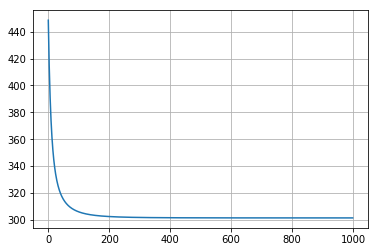

In [60]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [61]:
y_pred_train = predict(X_scaled,m)

In [62]:
accuracy(Y,y_pred_train)

79.79041916167665

## Loading testing data and applying preprocessing and cleaning

In [63]:
X_test = pd.read_csv("Titanic-Test-Data.csv")

In [64]:
X_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [65]:
X_test.drop(["Name","Ticket"],axis=1,inplace=True)

In [66]:
X_test["Male"] = X_test["Sex"].apply(male_ohe)
X_test["Female"] = X_test["Sex"].apply(female_ohe)

In [67]:
X_test.drop("Sex",axis=1,inplace=True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Male,Female
0,2,8.0,1,1,36.7500,NaN,S,1,0
1,1,49.0,0,0,25.9292,D17,S,0,1
2,3,NaN,0,0,7.7375,NaN,Q,1,0
3,2,24.0,2,1,27.0000,NaN,S,0,1
4,1,36.0,0,0,26.2875,E25,S,1,0


In [68]:
X_test["Cherbourg"] = X_test.Embarked.apply(cherbourg)
X_test["Queenstown"] = X_test.Embarked.apply(queenstown)
X_test["Southamptom"] = X_test.Embarked.apply(southamptom)
X_test.drop("Embarked",axis=1, inplace=True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,8.0,1,1,36.7500,NaN,1,0,0,0,1
1,1,49.0,0,0,25.9292,D17,0,1,0,0,1
2,3,NaN,0,0,7.7375,NaN,1,0,0,1,0
3,2,24.0,2,1,27.0000,NaN,0,1,0,0,1
4,1,36.0,0,0,26.2875,E25,1,0,0,0,1


In [69]:
X_test["Cabin"] = X_test.Cabin.apply(cabin)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,8.0,1,1,36.7500,0,1,0,0,0,1
1,1,49.0,0,0,25.9292,1,0,1,0,0,1
2,3,NaN,0,0,7.7375,0,1,0,0,1,0
3,2,24.0,2,1,27.0000,0,0,1,0,0,1
4,1,36.0,0,0,26.2875,1,1,0,0,0,1


In [71]:
X_test["Age"].fillna(X_test["Age"].mean(),inplace=True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,8.000000,1,1,36.7500,0,1,0,0,0,1
1,1,49.000000,0,0,25.9292,1,0,1,0,0,1
2,3,29.694775,0,0,7.7375,0,1,0,0,1,0
3,2,24.000000,2,1,27.0000,0,0,1,0,0,1
4,1,36.000000,0,0,26.2875,1,1,0,0,0,1


In [72]:
X_test = X_test.values

In [73]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled.shape

(223, 11)

In [75]:
X_test_scaled = np.append(X_test_scaled,np.ones(X_test_scaled.shape[0]).reshape(-1,1),axis=1)

## Getting Y predictions for test data

In [76]:
y_pred_test = predict(X_test_scaled,m)

In [79]:
np.savetxt('pred.csv',y_pred_test)